<a href="https://colab.research.google.com/github/MohammadWaleed339/text-summarization/blob/main/textsummarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U accelerate
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install py7zr
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

* ***accelerate*** helps train and fine tune model in parallel with gpu.

* ***bertviz*** helps visuialize attention mechanism to understand working of BERT model.

* ***UMAP*** uniform manifold approximation technique for dimensionality reduction.

* ***sentencepiece*** used with transformer model for unsupervised text tokenization.

* ***py7zr*** used to extract data from compressed files.

* ***datasets*** library from hugging face to work with datasets of natural language processing.

In [1]:
#contains 463859 datasets.
from datasets import load_dataset
dataset = load_dataset('cnn_dailymail', "3.0.0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

In [2]:
"""conrians data with main article and highlights of it, to train for summarization
"""
dataset

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})

In [ ]:
dataset['train'][0]['highlights']

"Harry Potter star Daniel Radcliffe gets £20M fortune as he turns 18 Monday .\nYoung actor says he has no plans to fritter his cash away .\nRadcliffe's earnings from first five Potter films have been held in trust fund ."

In [ ]:
dataset['train'][0]['article']

'LONDON, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won\'t cast a spell on him. Daniel Radcliffe as Harry Potter in "Harry Potter and the Order of the Phoenix" To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties. "I don\'t plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar," he told an Australian interviewer earlier this month. "I don\'t think I\'ll be particularly extravagant. "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs." At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film "Hostel: Part II," currently six places below his number one movie on the UK box office chart. Details o

In [ ]:
dataset['train'].features

{'article': Value('string'),
 'highlights': Value('string'),
 'id': Value('string')}

In [3]:
from transformers import pipeline

In [4]:
pipe = pipeline('text-generation', model = "gpt2-medium" )

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [5]:
input_text = dataset['train'][1]["article"][:2000] # 2nd item of dataser and first 2000 character of article
query = input_text + "\nTL;DR:\n"  # Too large did't read.
pipe_out = pipe(query, max_length = 512, clean_up_tokenization_spaces=True)
# 512 is token limit not character limit
# also cleans the extraspace during tokenisation.

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=512) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [ ]:
#so the pipe function takes incomplete input out puts most suitable next text output
len(pipe_out[0]['generated_text'])

2479

In [ ]:
# the output text ahead of input text provided.
pipe_out[0]['generated_text']

'Editor\'s note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O\'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won\'t do what they\'re told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less likely to foll

In [ ]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text']

In [6]:
# T-5 transformers is used
pipe = pipeline('summarization', model ='t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
pipe_out = pipe(input_text)

In [ ]:
pipe_out[0]['summary_text']

'mentally ill inmates housed on the "forgotten floor" of a pretrial detention facility in florida . inmates with the most severe mental illnesses are incarcerated until they\'re ready to appear . a judge says the arrests often result from confrontations with police . mentally ill people often won\'t do what police say, judge says .'

In [ ]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

In [ ]:
# Using Bart by facebook
pipe = pipeline('summarization', model = 'facebook/bart-large-cnn')
pipe_out = pipe(input_text)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0


In [ ]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

In [ ]:
# Using google transformers
pipe = pipeline('summarization', model = 'google/pegasus-cnn_dailymail')

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
pipe_out = pipe(input_text)

In [ ]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

In [ ]:
for model in summaries :
    print(model.upper())
    print(summaries[model])
    print("")

GPT2-MEDIUM-380M
Editor's note: In our Behind the Scenes series, CNN correspondents share their experiences in covering news and analyze the stories behind the events. Here, Soledad O'Brien takes users inside a jail where many of the inmates are mentally ill. An inmate housed on the "forgotten floor," where many mentally ill inmates are housed in Miami before trial. MIAMI, Florida (CNN) -- The ninth floor of the Miami-Dade pretrial detention facility is dubbed the "forgotten floor." Here, inmates with the most severe mental illnesses are incarcerated until they're ready to appear in court. Most often, they face drug charges or charges of assaulting an officer --charges that Judge Steven Leifman says are usually "avoidable felonies." He says the arrests often result from confrontations with police. Mentally ill people often won't do what they're told when police arrive on the scene -- confrontation seems to exacerbate their illness and they become more paranoid, delusional, and less lik

In [4]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [5]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer =  AutoTokenizer.from_pretrained(model_ckpt)
model =  AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [6]:
samsum = load_dataset("knkarthick/samsum")
samsum

README.md: 0.00B [00:00, ?B/s]

train.csv: 0.00B [00:00, ?B/s]

validation.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
})

In [7]:
def is_valid(example):
    return isinstance(example['dialogue'], str) and isinstance(example['summary'], str)

samsum = samsum.filter(is_valid)


Filter:   0%|          | 0/14732 [00:00<?, ? examples/s]

Filter:   0%|          | 0/818 [00:00<?, ? examples/s]

Filter:   0%|          | 0/819 [00:00<?, ? examples/s]

In [8]:
len(samsum['train'][0]['dialogue'].split())

16

In [9]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

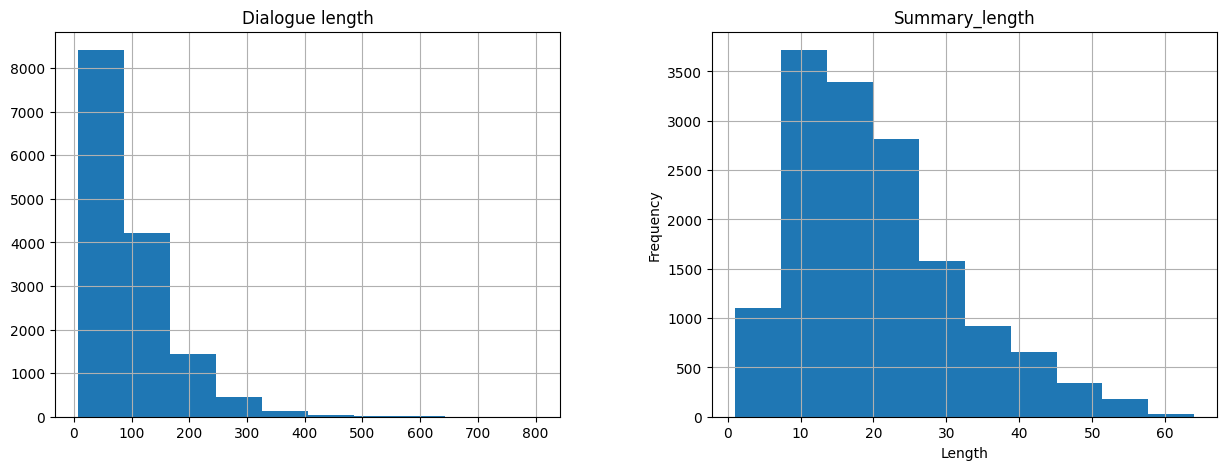

np.int64(14731)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue length', 'Summary_length']
data.hist(figsize = (15,5))
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()
data['Dialogue length'].count()

In [ ]:
#lets build data collator

def get_feature(batch):

    encodings = tokenizer(batch['dialogue'],
                         text_target = batch['summary'],
                          max_length = 1024, #limits toenized sequence to 1024 token
                          truncation = True) #truncate more than that

    #making the output of encoding into a labeled dictionary
    encodings = {'input_ids': encodings['input_ids'], #dialogue into tokens.
            'attention_mask': encodings['attention_mask'], #binary mask showing which token are real and which is padding.
                     'labels': encodings['labels'] #target into tokens.
                }

    return encodings

In [ ]:
samsum_pt = samsum.map(get_feature, batched = True)
samsum_pt

Map:   0%|          | 0/14731 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14731
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
})

In [ ]:
# make embedding to pytorch tensor same as array bu tgood for DeepL.task and run with GPU and CPU both.
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type = 'torch', columns = columns)


In [ ]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model = model)
from transformers import TrainingArguments, Trainer

In [ ]:

training_args = TrainingArguments(
                                 output_dir = 'bart_samsum',
                                 num_train_epochs=1,
                                 warmup_steps=500,
                                 per_device_train_batch_size=4,
                                 weight_decay=0.01,
                                 logging_steps=10,
                                 #evaluation_strategy='steps',
                                 eval_steps=500,
                                 save_steps=1e6,
                                 gradient_accumulation_steps=16
                                 )

trainer = Trainer(model = model,
                  args = training_args,
                  tokenizer = tokenizer,
                  data_collator = data_collator,
                  train_dataset = samsum_pt['train'],
                  eval_dataset = samsum_pt['validation'])

/tmp/ipython-input-2273646566.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model = model,


7f19a6ca104ca9632ef0529398e2eae0d796c8b5

In [ ]:
trainer.train()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: mohammadwaleed339 (mohammadwaleed339-aligarh-muslim-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.11/dist-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)


Step,Training Loss
10,2.148700
20,1.919400
30,1.777900
40,1.609700
50,1.558500
60,1.496400
70,1.493600
80,1.483000
90,1.412400
100,1.416600


Step,Training Loss
10,2.148700
20,1.919400
30,1.777900
40,1.609700
50,1.558500
60,1.496400
70,1.493600
80,1.483000
90,1.412400
100,1.416600


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:3909: UserWarning: Moving the following attributes in the config to the generation config: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0}. You are seeing this warning because you've set generation parameters in the model config, as opposed to in the generation config.
  warnings.warn(


TrainOutput(global_step=231, training_loss=1.4770837150094829, metrics={'train_runtime': 1835.6601, 'train_samples_per_second': 8.025, 'train_steps_per_second': 0.126, 'total_flos': 8370818229387264.0, 'train_loss': 1.4770837150094829, 'epoch': 1.0})

In [ ]:
# import pickle "this is not working so using .save_model and then zippin the file to download"
# pickle.dump(trainer, open('textsummarization.pkl', 'wb'))
trainer.save_model('Coder_one_2nd_project')

TypeError: cannot pickle 'weakref.ReferenceType' object

In [ ]:
# Custome dialogue prediction

pipe = pipeline('summarization', model = 'Coder_one_2nd_project')
gen_kwargs = {"length_penalty": 0.8,
                   "num_beams":8,
                  "max_length":128}

custome_dialogue = """
Aria, a curious girl, discovers the magical Enchanted Forest, home to mystical creatures and the wise dragon Eldrin. The forest faces
a threat from the evil sorcerer Malakar, who seeks to drain its magic. With the help of Eldrin, Aria embarks on a quest to find three
ancient relics to defeat Malakar. Along the way, she makes new friends and overcomes challenges. Aria ultimately defeats Malakar,
restoring the forest's magic.
The creatures celebrate her bravery, and Aria continues her adventures in the Enchanted Forest, filled with wonder and friendship.

"""

print(pipe(custome_dialogue, **gen_kwargs))

Device set to use cuda:0


[{'summary_text': "Aria discovers the magical Enchanted Forest, home to mystical creatures and the wise dragon Eldrin. With the help of Eldrin, Aria embarks on a quest to find three relics to defeat the evil sorcerer Malakar and restore the forest's magic."}]


In [ ]:
# make zip file of the trained model to save and use for later
!zip -r /content/Coder_one_2nd_project.zip /content/Coder_one_2nd_project

  adding: content/Coder_one_2nd_project/ (stored 0%)
  adding: content/Coder_one_2nd_project/vocab.json (deflated 59%)
  adding: content/Coder_one_2nd_project/config.json (deflated 62%)
  adding: content/Coder_one_2nd_project/tokenizer.json (deflated 82%)
  adding: content/Coder_one_2nd_project/model.safetensors (deflated 7%)
  adding: content/Coder_one_2nd_project/generation_config.json (deflated 48%)
  adding: content/Coder_one_2nd_project/special_tokens_map.json (deflated 52%)
  adding: content/Coder_one_2nd_project/merges.txt (deflated 53%)
  adding: content/Coder_one_2nd_project/tokenizer_config.json (deflated 75%)
  adding: content/Coder_one_2nd_project/training_args.bin (deflated 51%)
